In [14]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("loan.csv")

In [4]:
dataset.head(10)

,loan_id,Gender,Married,Dependents,Education,self_employed,applicantincome,coapplicant_income,loan_amount,property
0,12.0,male,no,0.0,graduate,no,453453.0,0,232,urban
1,34.0,female,yes,1.0,NaN,yes,5435.0,3434,232,rural
2,5.0,male,NaN,2.0,ungraduate,NaN,4545.0,3,32,rural
3,65.0,NaN,no,NaN,NaN,no,NaN,3434,2,urban
4,767.0,female,yes,2.0,graduate,NaN,NaN,3445,323,rural
5,8.0,NaN,NaN,NaN,NaN,yes,NaN,454,2,urban
6,78.0,female,NaN,1.0,ungraduate,NaN,NaN,343,32,rural
7,NaN,male,yes,0.0,NaN,yes,4545.0,23223,32,urban
8,89.0,NaN,no,NaN,NaN,no,4.0,323,323,rural


In [37]:
dataset.shape

(9, 11)

In [10]:
dataset.isnull().sum()

loan_id               1
Gender                3
Married               3
Dependents            3
Education             5
self_employed         3
applicantincome       0
coapplicant_income    0
loan_amount           0
property              0
dtype: int64

In [25]:
dataset.describe()

,loan_id,Dependents,applicantincome,coapplicant_income,loan_amount
count,8.000000,6.000000,9.000000,9.000000,9.000000
mean,132.250000,1.000000,54018.000000,3851.000000,134.444444
std,258.564029,0.894427,149796.364143,7430.652394,139.959022
min,5.000000,0.000000,4.000000,0.000000,2.000000
25%,11.000000,0.250000,4545.000000,323.000000,32.000000
50%,49.500000,1.000000,4545.000000,454.000000,32.000000
75%,80.750000,1.750000,4545.000000,3434.000000,232.000000
max,767.000000,2.000000,453453.000000,23223.000000,323.000000


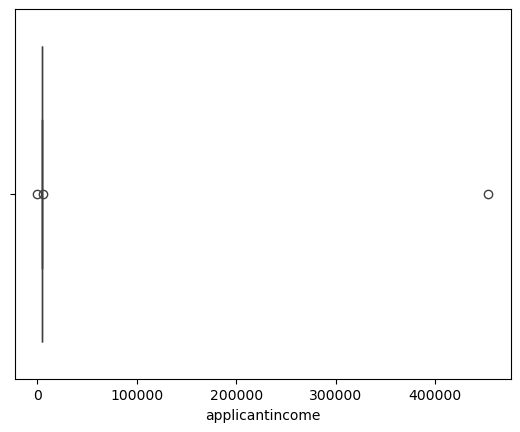

In [16]:
sns.boxplot(x="applicantincome",data=dataset)
plt.show()

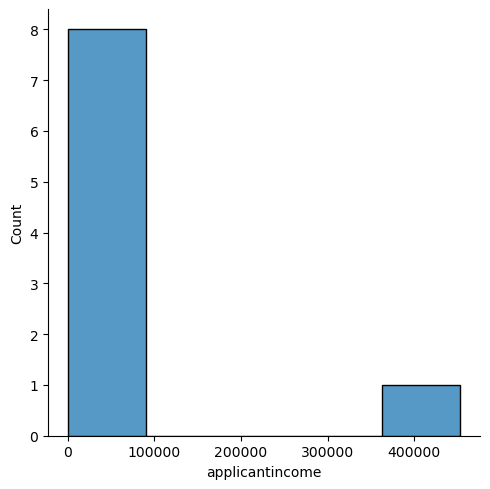

In [18]:
sns.displot(dataset["applicantincome"])
plt.show()

In [9]:
dataset.fillna({"applicantincome":dataset["applicantincome"].mode()[0]},inplace=True)

In [12]:
min_range=dataset["applicantincome"].mean() - (3*dataset["applicantincome"].std())
max_range=dataset["applicantincome"].mean() + (3*dataset["applicantincome"].std())

In [13]:
min_range,max_range

(np.float64(-395371.09242937795), np.float64(503407.09242937795))

In [19]:
new_dataset=dataset[dataset["applicantincome"]<max_range]

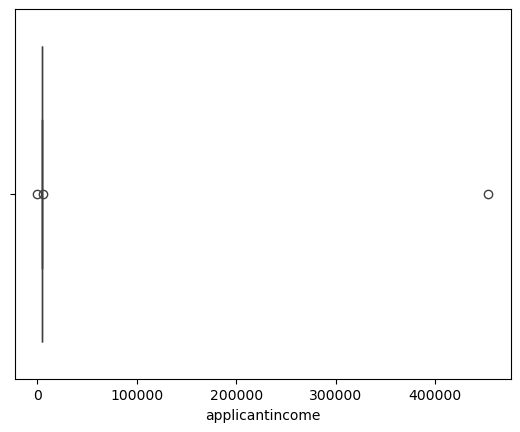

In [20]:
sns.boxplot(x="applicantincome",data=new_dataset)
plt.show()

In [22]:
new_dataset.describe()

,loan_id,Dependents,applicantincome,coapplicant_income,loan_amount
count,8.000000,6.000000,9.000000,9.000000,9.000000
mean,132.250000,1.000000,54018.000000,3851.000000,134.444444
std,258.564029,0.894427,149796.364143,7430.652394,139.959022
min,5.000000,0.000000,4.000000,0.000000,2.000000
25%,11.000000,0.250000,4545.000000,323.000000,32.000000
50%,49.500000,1.000000,4545.000000,454.000000,32.000000
75%,80.750000,1.750000,4545.000000,3434.000000,232.000000
max,767.000000,2.000000,453453.000000,23223.000000,323.000000


In [38]:
new_dataset

,loan_id,Gender,Married,Dependents,Education,self_employed,applicantincome,coapplicant_income,loan_amount,property
0,12.0,male,no,0.0,graduate,no,453453.0,0,232,urban
1,34.0,female,yes,1.0,NaN,yes,5435.0,3434,232,rural
2,5.0,male,NaN,2.0,ungraduate,NaN,4545.0,3,32,rural
3,65.0,NaN,no,NaN,NaN,no,4545.0,3434,2,urban
4,767.0,female,yes,2.0,graduate,NaN,4545.0,3445,323,rural
5,8.0,NaN,NaN,NaN,NaN,yes,4545.0,454,2,urban
6,78.0,female,NaN,1.0,ungraduate,NaN,4545.0,343,32,rural
7,NaN,male,yes,0.0,NaN,yes,4545.0,23223,32,urban
8,89.0,NaN,no,NaN,NaN,no,4.0,323,323,rural


In [39]:
new_dataset.shape

(9, 10)

In [29]:
z_index=(dataset["applicantincome"] - dataset["applicantincome"].mean()) / (dataset["applicantincome"].std())

In [40]:
dataset["Z_Index"]=z_index

In [43]:
dataset.head(2)

,loan_id,Gender,Married,Dependents,Education,self_employed,applicantincome,coapplicant_income,loan_amount,property,Z_Index
0,12.0,male,no,0.0,graduate,no,453453.0,0,232,urban,2.666520
1,34.0,female,yes,1.0,NaN,yes,5435.0,3434,232,rural,-0.324327


In [41]:
dataset[dataset["Z_Index"]<3]

,loan_id,Gender,Married,Dependents,Education,self_employed,applicantincome,coapplicant_income,loan_amount,property,Z_Index
0,12.0,male,no,0.0,graduate,no,453453.0,0,232,urban,2.666520
1,34.0,female,yes,1.0,NaN,yes,5435.0,3434,232,rural,-0.324327
2,5.0,male,NaN,2.0,ungraduate,NaN,4545.0,3,32,rural,-0.330268
3,65.0,NaN,no,NaN,NaN,no,4545.0,3434,2,urban,-0.330268
4,767.0,female,yes,2.0,graduate,NaN,4545.0,3445,323,rural,-0.330268
5,8.0,NaN,NaN,NaN,NaN,yes,4545.0,454,2,urban,-0.330268
6,78.0,female,NaN,1.0,ungraduate,NaN,4545.0,343,32,rural,-0.330268
7,NaN,male,yes,0.0,NaN,yes,4545.0,23223,32,urban,-0.330268
8,89.0,NaN,no,NaN,NaN,no,4.0,323,323,rural,-0.360583


In [42]:
dataset[dataset["Z_Index"]<3].shape

(9, 11)